<font size= '4'>Sesethu Bango</font>

<font size= '4'>ZAIO Assignment 1: Student Habits and Academic Performance Analysis</font>

<font size= '3'>Phase 1: Data Loading & Preprocessing</font>

Creating a DataLoader class that handles file I/O and exceptions. 

In [2]:
import pandas as pd
import numpy as np

# Creating a DataLoader class that handles file I/O and exceptions
class DataLoaderIO_nException:
    def __init__(self, file_path):
        self.file_path = file_path

    # Error handling check whether file being loaded is of CSV format
    # (Function) Check file format
    def format_check(self): 
        try:
            if self.file_path[-4:] != '.csv':
                return 'Invalid file format used, please input a CSV format file'
            else:
                return self.file_path, ' Correct format detected'
        except TypeError:
            return 'Invalid file, please provide a valid file'      
        
    # (Function) Check file readability and permissions
    def readFile_check(self):
        try:
            with open(self.file_path, 'r') as f:
                contents = f.read()
                return 'File read successfully'
        except FileNotFoundError:
            return 'Error: The file was not found.'
        except PermissionError:
            return 'Error: Permission denied to read the file.'


In [3]:
# Using the DataLoader_IO_n_Excep class
print('\n')
print('Checking file format from file path/name')
filePath = 'student_habits_performance.csv'
file_test = DataLoaderIO_nException(filePath)
print(file_test.format_check())

print('\n')
print('Checking file readibility and permissions')
print(file_test.readFile_check())




Checking file format from file path/name
('student_habits_performance.csv', ' Correct format detected')


Checking file readibility and permissions
File read successfully


Creating and implimenting a DataCleaner class to; Check for missing values, Remove duplicates, Validate data ranges.

In [4]:
class DataCleaner_Ass1:
    # Part of Validation process
    def check_emptyDataFrame(df): # Check of an empty dataframe, hence an empty CSV file
        if(df.empty):
            print('Empty DataFrame, empty CSV file') 
        else:
            print('Loaded DataFrame, hence CSV file is not empty')
        return df
    
    # Check for missing values
    def check_missing(df):
        df_check = df.isna()
        count1 = 0 # To count the number of missing and non missing values
        count2 = 0
        for col in df_check.columns:
            for row in df_check[col]:
                if row == True: # Returns a missing value
                    count1 += 1
                    # print(row, col) # Shows where the None values are. NOTE They are in the 'parental_education_level'
                else:
                    count2 += 1# Returns a non missing value
        print('Number of missing values', count1)
        print('Total number of values in the table', count1 + count2)

        missing_percentage = 100.0 * count1 / (count1 + count2)
        print(f'Proportion of missing data to the total: {round(missing_percentage, 2)}% of data is missing.') # percentage is well below 1%, Unlikely to have a major impact on overall findings
        # print(df.isna()) # Returns missing values as true
        
    def parentalNulls_fix(df): # Rename null/'None' values in 'parental_education_level' column to 'No Education' 
        rows_total = df.shape[0] # Total number of rows

        for i in range(rows_total):
            if pd.isna(df.loc[i, 'parental_education_level']): 
                df.loc[i, 'parental_education_level'] = 'No Education'
        return df
        # Could've done all this using one line
        # df['parental_education_level'].fillna('No Education', inplace= True)

    # Remove duplicates
    def dropDuplicates(df):
        df_noDuplicates = df.drop_duplicates() # Removes any row that is a duplicate of any other, leaving obly the first occurance
        return df_noDuplicates
    
    # Validate data ranges
    def dataTypes(df): # return the datatypes of each column
        return df.dtypes
    
        # Validate, check for negative values where applicable
    def check_negatives(df, column_name):
        has_negative = (df[column_name] < 0).any()
        return has_negative


In [5]:
# Create DataFrame from 'student_habits_performance.csv'
# Read CSV with delimiter (;)
df = pd.read_csv('student_habits_performance.csv', delimiter= ';') # Values in the file are seperated by delimiter ';'. Hence the file is now readable as a df.
print('\n')
print('Original DataFrame, first 5 rows:')
print(df.head())  

print('\n')
print('DataFrame information:')
print(df.info()) # Print column names
#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

clean_1 = DataCleaner_Ass1
# Check empty DataFrame
print('\nCheck for empty DataFrame:')
clean_1.check_emptyDataFrame(df)

# Using the DataCleaner_Ass1 class
print('\nCheck for missing values:')
clean_1.check_missing(df)

# Using the 'check_missing' method is how we find where the null/None values are, in the 'parental_education_level' column.
# Replacing None values with the value 'No Education'
clean_1.parentalNulls_fix(df) # Should return a null free dataframe
# To check whether it's really null free:
print('\nCheck DataFrame after replacing Null/None values:')
clean_1.check_missing(df)

# Removing duplicates
print('\nDataFrame after removing duplicate rows, of which there were none (showing first 5 rows):')
df_duplicateFree = clean_1.dropDuplicates(df)
print(df_duplicateFree.head()) 
print('Number of rows and columns respectively:', df.shape)
print('Result says there are zero duplicates in the original dataframe. Number of rows before are equal to the number of rows after implementing the duplicateFree method.')

print('\nDatatypes for each column:')
print(clean_1.dataTypes(df))

# Check negatives. Check each number value column individually
print('\n')
print("Column 'exam_score' contains negative values:", clean_1.check_negatives(df, 'exam_score')) 
print('Result is False, meaning there are no negetaive values. NOTE I checked all of the other columns too, there are no negative values')




Original DataFrame, first 5 rows:
  student_id  age  gender  study_hours_per_day  social_media_hours  \
0      S1000   23  Female                  0.0                 1.2   
1      S1001   20  Female                  6.9                 2.8   
2      S1002   21    Male                  1.4                 3.1   
3      S1003   23  Female                  1.0                 3.9   
4      S1004   19  Female                  5.0                 4.4   

   netflix_hours part_time_job  attendance_percentage  sleep_hours  \
0            1.1            No                   85.0          8.0   
1            2.3            No                   97.3          4.6   
2            1.3            No                   94.8          8.0   
3            1.0            No                   71.0          9.2   
4            0.5            No                   90.9          4.9   

  diet_quality  exercise_frequency parental_education_level internet_quality  \
0         Fair                   6        

<font size= '3'>Phase 2: Statistical Analysis</font>

Developing a StudentAnalyser class with methods to:
Calculate mean/median study time by mental health tier. Identify correlation between sleep and exam scores. Identify outliers in social media usage.

In [6]:
class StudentAnalyser:
    #  (Function) Isolate and return only two specific columns from the DF
    def isolateColumns(df, column_name1, column_name2):
        df_condensed = df[[column_name1, column_name2]] 
        return df_condensed
    
    # (Funtion) Group and calculate various aggregations
    def group_nFind(df, grouped_column, agg): # grouped_column is the column the groupby function is applied to. agg is the choice of aggregation used.
        if agg == 'mean':
            df_grouped = df.groupby([grouped_column]).mean().round(2) 
        elif agg == 'median':
            df_grouped = df.groupby([grouped_column]).median().round(2) 
        return df_grouped

    # (Funtion) Group the sleep hours into distinct intervals and find the average exam score for each group
    def groupDistinct_avgScore(df):
        sum_4 = 0; cnt4 = 0 # Initialize some counts for each group
        sum_6 = 0; cnt6 = 0
        sum_7 = 0; cnt7 = 0
        sum_9 = 0; cnt9 = 0
        sum_10 = 0; cnt10 = 0
        
        for i, row in (df.iterrows()): # Iterate over indices and rows
            if row['sleep_hours'] >= 3.0 and row['sleep_hours'] < 4.5:
                sum_4 += row['exam_score']
                cnt4 += 1
            elif row['sleep_hours'] >= 4.5 and row['sleep_hours'] < 6.0:
                sum_6 += row['exam_score']
                cnt6 += 1
            elif row['sleep_hours'] >= 6.0 and row['sleep_hours'] < 7.5:
                sum_7 += row['exam_score']
                cnt7 += 1
            elif row['sleep_hours'] >= 7.5 and row['sleep_hours'] < 9.0:
                sum_9 += row['exam_score']
                cnt9 += 1
            elif row['sleep_hours'] >= 9.0:
                sum_10 += row['exam_score']
                cnt10 += 1

        mean_4 = sum_4 / cnt4
        mean_6 = sum_6 / cnt6
        mean_7 = sum_7 / cnt7
        mean_9 = sum_9 / cnt9
        mean_10 = sum_10 / cnt10
        # total_count = cnt4+ cnt6 + cnt7 + cnt9 + cnt10 # To ensure we're accounting for all 1000 rows
        # print(total_count)
        new_df = pd.DataFrame({
            'sleep_intervals, hrs': ['3.0 - 4.5', '4.5 - 6.0', '6.0 - 7.5', '7.5 - 9.0', '>9.0'],
            'mean_exam_score': [mean_4, mean_6, mean_7, mean_9, mean_10]
        })
        return new_df
    
    # (Function) Find the standard deviation of a single column
    def isolate_nStd(df, column_name):
        sigma = round(np.std(df[column_name]), 2) # Returns the standard deviation 
        return sigma
    
    # (Function) Find outlier values and indices of a single column. NOTE it may need to be normally distributed, find out
    def findOutliers(df, column_name, sigma): #NOTE Returns two variables, sigma is the standard deviation. 
        mean_value = df[column_name].mean() # Mean value
        print('Mean value:', mean_value)
        
        # Upper and lower boundaries, beyond which we can identify outliers
        upper_b = round(mean_value + (3 * sigma), 2)
        lower_b = round(mean_value - (3 * sigma), 2)
        print('Upper and lower boundaries', upper_b, lower_b) # There are no values for 'social_media_hours' that are less than 0, lower_b is less than that . Hence there won't be any lower bound outliers
        
        # Find outliers
        rows_total = df.shape[0]
        index_val = []
        outlier_val = []
        for i in range(rows_total):
            if df.loc[i, column_name] > upper_b:
                index_val.append(i) # Returns index of outlier
                outlier_val.append(df.loc[i, column_name]) # Returns outlier value
                
            elif df.loc[i, column_name] < lower_b:
                index_val.append(i) # Returns index of outlier
                outlier_val.append(df.loc[i, column_name]) # Returns outlier value
        
        return outlier_val, index_val


In [7]:
# Instantiate and find mean/median study time by mental health tier 
StA = StudentAnalyser
df_grouped_1 = StA.isolateColumns(df, 'mental_health_rating', 'study_hours_per_day')

print('\nAverage study hours per day, grouped by mental health rating')
df_grouped_1_mean = StA.group_nFind(df_grouped_1, 'mental_health_rating', 'mean') 
print(df_grouped_1_mean)

print('\nMedian study hours per day, grouped by mental health rating')
df_grouped_1_median = StA.group_nFind(df_grouped_1, 'mental_health_rating', 'median')
print(df_grouped_1_median)
#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Identify correlation between sleep and exam scores
# Isolate the two columns
df_sl_ex = StA.isolateColumns(df, 'sleep_hours', 'exam_score')
# print(df_sl_ex)

print('\nIdentify correlation between sleep and exam scores by finding exam_score grouped by sleep_hours.') # Best way to do this is to visualize it.. Later
# df_sl_ex_grouped = StA.group_nFind(df_sl_ex, 'sleep_hours', 'mean')
# print(df_sl_ex_grouped.head()) # Not a very useful result
new_df = StA.groupDistinct_avgScore(df_sl_ex)
print('\nCorrelation between sleep_time and exam_scores')
print(new_df)

#----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

print('\nDetect outliers in social media usage')
sigma = StA.isolate_nStd(df, 'social_media_hours')
print('\nStandard dev. of social media hours', sigma)

# Find outlers
outlier_value, index_value = StA.findOutliers(df, 'social_media_hours', sigma)
print('\nOutlier values:', outlier_value)
print('Outlier index values:', index_value)



Average study hours per day, grouped by mental health rating
                      study_hours_per_day
mental_health_rating                     
1                                    3.62
2                                    3.61
3                                    3.58
4                                    3.42
5                                    3.36
6                                    3.60
7                                    3.68
8                                    3.55
9                                    3.60
10                                   3.49

Median study hours per day, grouped by mental health rating
                      study_hours_per_day
mental_health_rating                     
1                                    3.80
2                                    3.65
3                                    3.30
4                                    3.40
5                                    3.50
6                                    3.60
7                                    

<font size= '3'>Phase 3: Visualisation</font>

Building a VisualisationEngine class that generates; a Histogram of study time distribution, a Scatter plot of sleep vs final score and Box plots of scores by diet quality.

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

class VisualisationEngine:
    # (Function) Create a histogram of one of the columns of a dataframe
    def histogram(df, column_name, num_of_bins, xlabel, ylabel): # specify these characteristics of your histogram
        study_time = df[column_name]
        title = 'Histogram of ' + column_name
        plt.hist(study_time, bins= num_of_bins, color= 'skyblue', edgecolor= 'black')
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.grid(True)
        plt.show()
    
    # (Function) Create a scatter plot of one column vs another
    def scatterPlot(df, column_name1, column_name2): # Specify these characteristics of your skatter plot
        x = df[column_name1]
        y = df[column_name2]
        x_threshold = np.mean(x)
        y_threshold = np.mean(y)
        title_name = 'Scatter plot of ' + column_name1 +  ' vs ' +  column_name2

        plt.scatter(x, y, alpha= 0.7, cmap= 'viridis', marker= '.')
        plt.xlabel(column_name1)
        plt.ylabel(column_name2)
        plt.title(title_name)
        
        # Add horizontal and vertical lines for the quadrants
        plt.axvline(x=x_threshold, color='r', linestyle='--', label=f'X Threshold ({x_threshold:.2f})')
        plt.axhline(y=y_threshold, color='r', linestyle='--', label=f'Y Threshold ({y_threshold:.2f})')

        # Add quadrant labels
        plt.text(x_threshold * 0.7, y_threshold * 1.2, 'Q2', fontsize=16, ha='center', va='center')
        plt.text(x_threshold * 1.3, y_threshold * 1.2, 'Q1', fontsize=16, ha='center', va='center')
        plt.text(x_threshold * 0.7, y_threshold * 0.6, 'Q3', fontsize=16, ha='center', va='center')
        plt.text(x_threshold * 1.3, y_threshold * 0.6, 'Q4', fontsize=16, ha='center', va='center')

        plt.show()
    
    # (Function) Create boxplots of scores by diet quality
    def boxplots(df, column_1, column_2):
        sns.boxplot(x= column_1, y= column_2, data= df[[column_1, column_2]])
        title_str = 'Box Plot of ' + column_2 + ' by ' + column_1
        plt.title(title_str)
        plt.xlabel(column_1)
        plt.ylabel(column_2)
        plt.show()


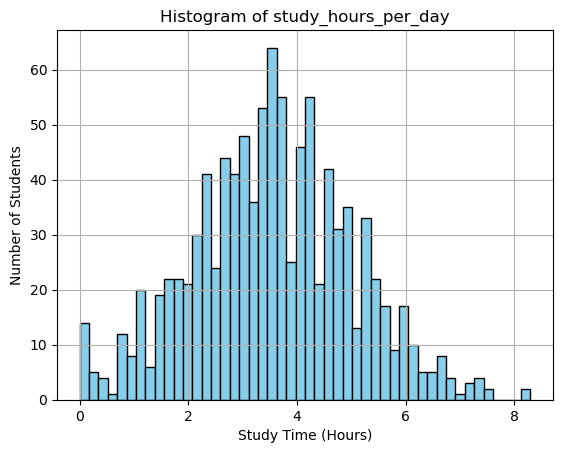

/tmp/ipykernel_138/1161962440.py:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x, y, alpha= 0.7, cmap= 'viridis', marker= '.')


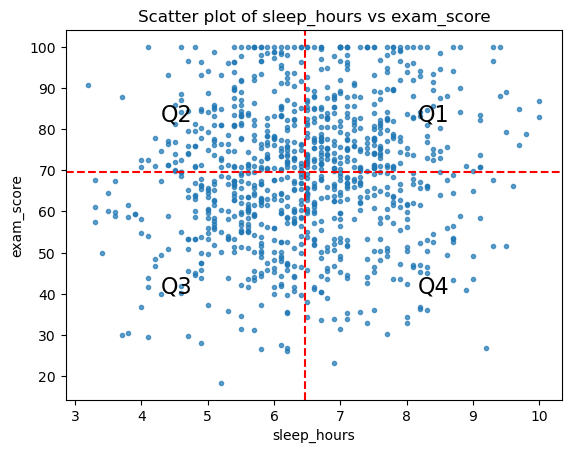

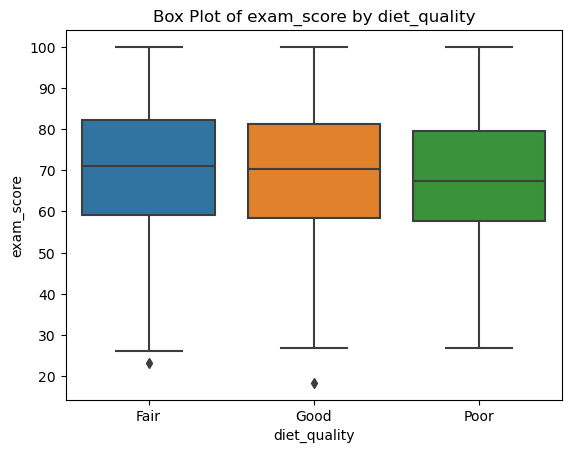

In [9]:
# Histogram of study time distibution
Vis = VisualisationEngine
column_name = 'study_hours_per_day'
x_label = 'Study Time (Hours)'
y_label = 'Number of Students'
histo_1 = Vis.histogram(df, column_name, 48, x_label, y_label)

# Skatter plot of sleep vs final scores
col_1 = 'sleep_hours'
col_2 ='exam_score'
skatter_1 = Vis.scatterPlot(df, col_1, col_2)

# Box plots of scores by diet quality
boxplot_1 = Vis.boxplots(df, 'diet_quality', 'exam_score')


<font size= '3'>Phase 4: Predictive Modeling

Create a score predictor class that; Uses linear regression to predict scores from habits, Implements error handling for invalid inputs, Saves models using pickle.


In [16]:
from sklearn.linear_model import LinearRegression
import pickle

class ScorePredictor:
    # (Function) Model function. Linear regression
    def model_LinearReg(df, X, x_new, prediction_num): # x_new is the new individual student characteristics. X is the input features, prediction_num is the index of the prediction required
        y = df['exam_score']

        model = LinearRegression() 
        model.fit(X, y)

        prediction = model.predict(x_new)[prediction_num]
        return prediction
   
    # (Function) Convert specific string value to an integer using kwargs. Hence we can then include string value coulumns in the model
    def string_to_Int(df, column_name, **kwargs):
        for i, value in enumerate(kwargs.values(), start= 1):
            df.loc[df[column_name] == value, column_name] = i
        return df

    # (Function) Creates DF of actual and predicted values and their percentage differance
    def compareActual_toPredicted(df, X, actualColumn_name): # actualValues is the actual value column name
        df_test_case_1 = X
        y = df[actualColumn_name]
        length_df = df_test_case_1.shape[0]
        list_predConsumption = []
        model = LinearRegression()
        model.fit(X, y)

        for i in range(length_df):
            list_predConsumption.append(round(model.predict(df_test_case_1)[i], 2)) # Returns list of predicted values

        # Convert list to df
        df_prediction = pd.DataFrame({'Predicted Score': list_predConsumption})  
        df_actual = df[actualColumn_name] # Original Energy Consumption column
        # print('\n', df_prediction, df_Energy_Cons)

        # Find percentage difference of predicted value from the actual value
        df_joined = df_prediction.join(df_actual) 
        # print('\n', df_joined)
        df_joined['Percent_Difference'] = round(((df_joined['Predicted Score'] - df_joined[actualColumn_name]) / df_joined[actualColumn_name]) * 100.0, 2)
        return df_joined

    # (Function) Saving model using pickle
    def save_usingPickle(df, X, actualColumn_name): # actualValues is the actual value column nam
        y = df[actualColumn_name]
        # Trained model
        model = LinearRegression()
        model.fit(X, y)
        model_file = 'trained_model.pkl'
        with open(model_file, 'wb') as file:
            pickle.dump(model, file)
        print(f"Model saved to {model_file}")


In [17]:
Sco = ScorePredictor   
print('\nApplying the model using columns that contain only number values:')
X = df[['age', 'study_hours_per_day', 'social_media_hours', 
        'netflix_hours', 'attendance_percentage', 
        'sleep_hours', 'exercise_frequency', 'mental_health_rating']]
# Error handling Test case
assert X.shape == (1000, 8),                             'Test case 1 failed. Dataset shape incorrect.'

print('Compare actual to predicted scores, first 10 entries:')
df_compare = Sco.compareActual_toPredicted(df, X, 'exam_score')
print(df_compare.head(10))

print('Average percent difference:', abs(df_compare['Percent_Difference']).sum() / 1000) # To find the average value

print('\nApplying the string_to_Int function to add more X features to the model, in an attempts to make the model more accurate.')
# Adding more 
new_df = Sco.string_to_Int(df, 'gender', arg1='Female', arg2='Male', arg3= 'Other') # String to integer the gender column, do the same to the other string columns
new_df = Sco.string_to_Int(new_df, 'part_time_job', arg1='No', arg2='Yes', arg3= 'Other')
new_df = Sco.string_to_Int(new_df, 'diet_quality', arg1='Good', arg2='Fair', arg3= 'Poor', arg4= 'Other')
new_df = Sco.string_to_Int(new_df, 'parental_education_level', arg1='Master', arg2='High School', arg3= 'Bachelor', arg4= 'No Education')
new_df = Sco.string_to_Int(new_df, 'internet_quality', arg1='Average', arg2='Poor', arg3= 'Good', arg4= 'Other')
new_df = Sco.string_to_Int(new_df, 'extracurricular_participation', arg1='No', arg2='Yes', arg3= 'Other')
               
X = new_df[['age', 'gender', 'study_hours_per_day', 'social_media_hours', # Now including former string columns
            'netflix_hours', 'part_time_job', 'attendance_percentage', 
            'sleep_hours', 'diet_quality', 'exercise_frequency', 
            'parental_education_level', 'internet_quality', 'mental_health_rating', 
            'extracurricular_participation']]
assert X.shape == (1000, 14),                             'Test case 1 failed. Dataset shape incorrect.'

print('Again we compare actual to predicted scores:')
df_compare = Sco.compareActual_toPredicted(df, X, 'exam_score')
print(df_compare.head(10))
print('Average percent difference:', abs(df_compare['Percent_Difference']).sum() / 1000) # To find the average value

print('\nApplying the model to predict the exam score of a student with defined characteristics')
x_new = pd.DataFrame([{
            'age': 25, 'gender': 2, 'study_hours_per_day': 6.0, 'social_media_hours': 3.0, 
            'netflix_hours': 1.0, 'part_time_job': 1, 'attendance_percentage': 80.0, 
            'sleep_hours': 7.0, 'diet_quality': 1, 'exercise_frequency': 1, 
            'parental_education_level': 3, 'internet_quality': 3, 'mental_health_rating': 1, 
            'extracurricular_participation': 1
                      }])
assert x_new.shape == (1, 14),                             'Test case 1 failed. Dataset shape incorrect.'

print('New prediction:')
prediction = round(Sco.model_LinearReg(df, X, x_new, 0), 1)
print(prediction)

print('\nSaving model using Pickle:')
save_model = Sco.save_usingPickle(df, X, 'exam_score')




Applying the model using columns that contain only number values:
Compare actual to predicted scores, first 10 entries:
   Predicted Score  exam_score  Percent_Difference
0            53.11        56.2               -5.50
1           107.26       100.0                7.26
2            41.63        34.3               21.37
3            39.68        26.8               48.06
4            70.67        66.4                6.43
5           107.72       100.0                7.72
6            88.80        89.8               -1.11
7            76.20        72.6                4.96
8            73.63        78.9               -6.68
9            96.66       100.0               -3.34
Average percent difference: 6.59416

Applying the string_to_Int function to add more X features to the model, in an attempts to make the model more accurate.
Again we compare actual to predicted scores:
   Predicted Score  exam_score  Percent_Difference
0            53.12        56.2               -5.48
1           1